# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

**Краткое описание:** 

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Данные по каждому из объявлений делятся на два вида: 
    1. Заполнены самостоятельно пользователями сервиса Яндекс.Недвижимость
    2. Заполнены автоматически на основе картографических данных.

**Цели проекта:** 
- выработка техники определения рыночной стоимость объектов недвижимости. 
- установление параметров, которые позволили бы построить автоматизированную систему для отслеживания аномалий и мошеннической деятельности.

## Загрузка и изучение данных

In [65]:
# изначально импортируем библиотеки, которые нам понадобятся для исследования
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [4]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Массив состоит из 23699 строк и 22 столбцов. Сущетсвенное количество столбцов имеют пустые значения. Целесообразность обработки данных в дальнейшем будем определять конечными целями проекта и задачами на пути их достижения. На первый взгляд видны аномально высокие или низкие значения в некоторых столбцах, а также неуместные нулевые значения. В ходе дальнейшей обработки попробуем высянить природу происхождения этих данных.

Данные, которые по предварительной оценке потребуют предобработи для дальнейших расчетов и решения задач проекта:
- total_area - площадь квартиры (высокие значения)
- living_area - жилая площадь (пропуски)
- kitchen_area - площадь кухни (пропуски)
- rooms - число комнат (высокие значения, проверка нулевых значений) 
- ceiling_height - высота потолков (аномально высокие/низкие значения)
- first_day_exposition - дата публикации (перевод в формат даты)
- days_exposition - колисечтво дней публикации (пропуски, перевод в целочисленный тип данных)
- floor - этаж
- floors_total - количество этажей (пропуски, перевод в целочисленный тип данных)             
- cityCenters_nearest	- расстояние до центра (пропуски, перевод в целочисленный тип данных)
- locality_name - населенные пункты (пропуски)

## Предобработка данных

### Замена пропусков значений площадей (жилая / кухня)

#### Промежуточные исследования и расчеты для заполнения пропусков

Предполагается, что данные с общей площадью квартиры являются одной из ключевых характеристик, на которой в в дальнешем будут основываться ряд расчетов. Т.к. в столбце нет пропусков приступим к исследованию значений в нем. Попытаемся определить выбросы и отсеять ненужные данные

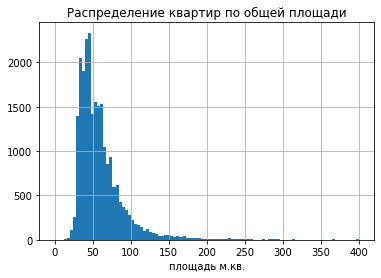

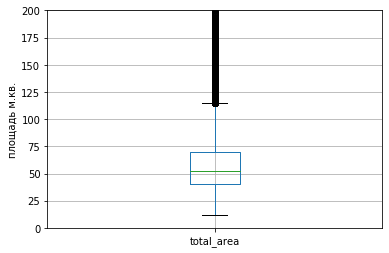

In [5]:
# для изучения распределения построим гистрограмму 
# а для определения выбросов  - диаграмму распределения ("ящик с усами")
df['total_area'].hist(bins=100, range=(0,400))
plt.xlabel('площадь м.кв.')
plt.title('Распределение квартир по общей площади')
plt.show()
plt.ylim(0, 200)
df.boxplot(column='total_area')
plt.ylabel('площадь м.кв.')
plt.show()

Большинство квартир находится в диапазоне с площадью 30-70 м.кв. При этом мы наблюдаем малочисленные выбросы до 900 кв.м. и небольшое количесвто значений после 200 кв.м. В данном случае имеем дело с распределением Пуассона, которое стремится к нормальному, но имеет длинный хвост с положительными значениями. При этом пик в районе 40-50 кв.м. выглядит закономерно с учетом значения медианы 52 кв.м.

Отметим, что верхний "ус" упирается в значение около 115 кв.м. Учитывая, что у нас имеется достаточно большое количество объектов за пределеами этой границы (порядка 4,5%), расширим границы исследования до 200 кв.м. Все значения за пределами этой границы будем считать выбросами.

С нижнним "усом" все впорядке. Оставим все данные в квартиле Q1 для дальнейшего исследвания.

In [6]:
# убедимся, что не потеряем большое количество данных
print(df.query('total_area > 200').shape[0])

# создадим новый df, очищенный от квартир в большой плоащадью
good_df = df.copy().query('total_area < 200')

227


Приступим к замене пропусков в неообходимых нам данных. Для замены пропусков в столбцах 'living_area', 'kitchen_area' сгруппируем объекты недвижимости по количичеству комнат и найдем медиану для последующей замены пропусков в соответсвующей категории.

In [7]:
# проверим на наличие дубликатов
good_df.duplicated().sum()

0

In [8]:
# оценим ситуацию с площадями квартир в зависимости от количества комнат для дальнейшей обработки данных
rooms_area_stat = good_df.pivot_table(index='rooms', 
                    values=['total_area', 'living_area', 'kitchen_area'], 
                      aggfunc=('median', 'mean', 'count'))
rooms_area_stat

kitchen_area                   living_area                      \
             count       mean median       count        mean  median   
rooms                                                                  
0                0        NaN    NaN         183   18.865246   18.00   
1             7213   9.550118   9.04        7388   17.893552   17.60   
2             7286   9.979584   8.80        7296   31.736849   30.50   
3             5367  11.242105   9.50        5356   47.252511   45.00   
4             1042  13.012073  11.00        1050   64.562333   63.00   
5              233  15.543691  14.00         240   88.087917   87.85   
6               56  16.289286  15.35          58  104.746724  104.90   
7               19  15.878947  15.90          19  108.794737  115.00   
8                2   6.100000   6.10           2  111.400000  111.40   
11               2  12.600000  12.60           2  133.900000  133.90   

      total_area                       
           count        mean   median  
rooms                                  
0            196   27.536276   26.025  
1           8046   37.587938   36.530  
2           7940   55.855089   53.000  
3           5799   77.305727   72.800  
4           1137  102.225787   98.000  
5            264  134.953750  132.750  
6             62  152.158065  155.900  
7             20  158.500000  160.250  
8              2  170.600000  170.600  
11             2  188.900000  188.900

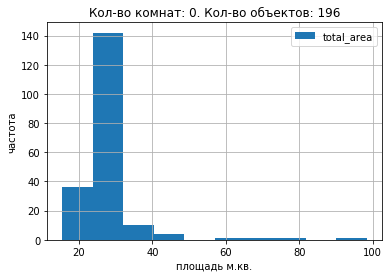

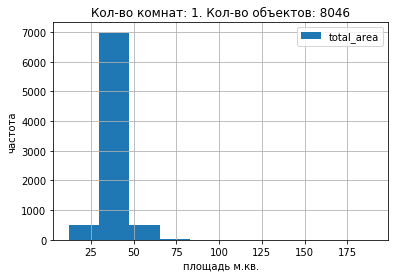

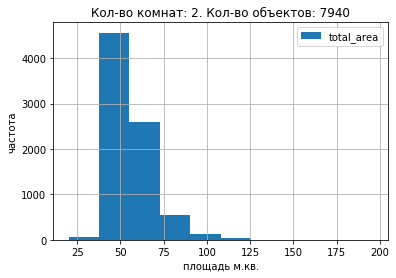

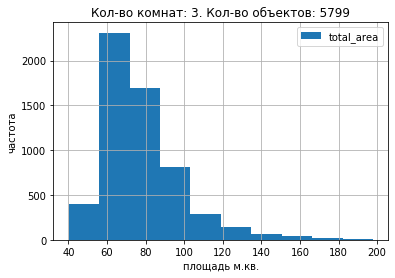

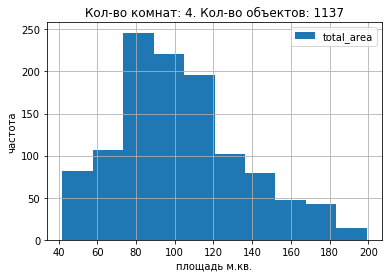

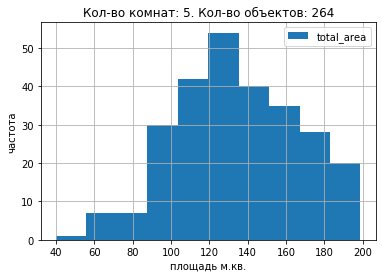

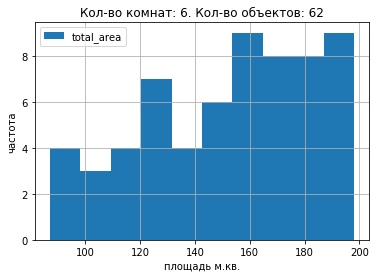

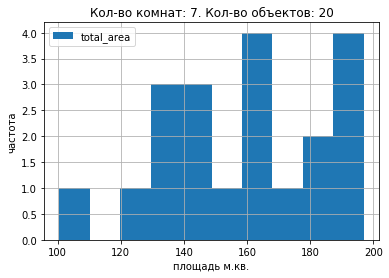

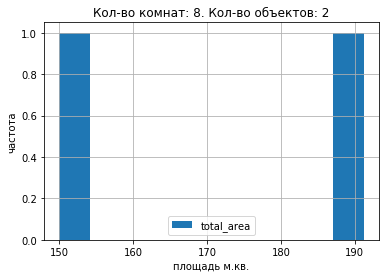

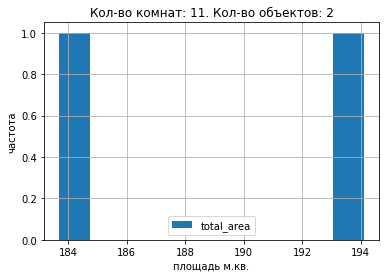

In [9]:
# посмотрим на распределение квартир по площади в зависимости от количества комнат
for name, grouped_data in good_df.groupby('rooms'):
    grouped_data.plot(kind='hist', y='total_area', 
        title='Кол-во комнат: {}. Кол-во объектов: {}'.format(name, grouped_data.shape[0]))
    plt.xlabel('площадь м.кв.')
    plt.ylabel('частота')
    plt.grid()
   

Площади квартир в целом сопоставимы с мединными/средними значениями для каждой категории (категория = кол-во комнат).
Немного странными выглядят квартиры-студии/коммунальные квартиры (0 комнат) с площадью 80-100 кв.м, а также 5-комнатные квартиры с маленькими площадями около 60 кв.м. Однако учитывая распространенность коммунальных квартир в Санкт-Петербурге, такая картина вполне допустима. 

Т.к. странных значений крайне мало и они вполне допустимы, удалять их пока не будем. 

In [10]:
# оценим зависимость между параметрами всех площадей и кол-ва комнат между собой
area_stat = good_df[['rooms', 'total_area', 'living_area', 'kitchen_area']]
print(area_stat.corr())

                 rooms  total_area  living_area  kitchen_area
rooms         1.000000    0.787048     0.871965      0.192947
total_area    0.787048    1.000000     0.923762      0.564291
living_area   0.871965    0.923762     1.000000      0.320219
kitchen_area  0.192947    0.564291     0.320219      1.000000


#### Замена пропусков жилой площади

In [11]:
# добавим новый столбец с соотношением жилой площади к общей
good_df['ratio_living_area'] = good_df['living_area'] / good_df['total_area']
display(good_df.head())

# расчитаем показатель соотношения для квартир с разным количеством комнат
median_table_living = good_df.pivot_table(index='rooms', values='ratio_living_area')
display(median_table_living)

# заполним пустые значения living_area
for room_type in median_table_living.index:
        good_df.loc[good_df['rooms'] == room_type, 'living_area'] = good_df.loc[good_df['rooms'] == room_type, 'living_area'].\
        fillna(median_table_living.loc[room_type, 'ratio_living_area'] * good_df['total_area'])
    
#проверяем наличие пустых значения    
good_df['living_area'].isna().sum()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000


,ratio_living_area
rooms,
0,0.685467
1,0.485989
2,0.579287
3,0.625568
4,0.649958
5,0.654966
6,0.694971
7,0.673479
8,0.659491


0

Расчет корреляции выше показывает, что жилая и общая площади сильно коррелируют между собой. Исходя из этого, пропуски значений жилой площади заполнены по принципу медианного значения удельного веса жилой в общей площади по каждой группе квартир (группа = кол-во комнат).

#### Замена пропусков площади кухни, где количество комнат = 0

In [12]:
#заполним значения пропусков для квартир-студий, у которых кухня объеденена с комнатой
good_df.loc[good_df['rooms'] == 0, 'kitchen_area'] = good_df.loc[good_df['rooms'] == 0, 'kitchen_area'].fillna(0)

#### Промежуточные расчеты для заполнения пропусков площади кухни

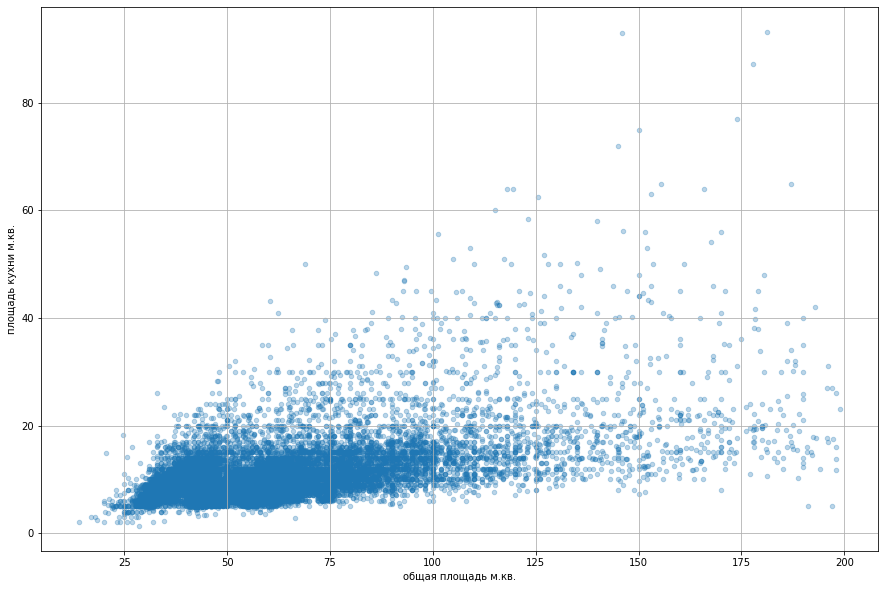

In [13]:
# посмотрим как распределяются значения площади кухни у остальных квартир
good_df.query('rooms > 0').sort_values(by='kitchen_area').plot(kind='scatter', x='total_area', y='kitchen_area', figsize = (15,10), alpha=0.3)
plt.xlabel('общая площадь м.кв.')
plt.ylabel('площадь кухни м.кв.')
plt.grid()
plt.show()


Ожидаемо, что площадь кухни НЕ растет прямопропорционально площади квартиры и 75% лежит в пределах 12 кв.м. Заменим пропущенные значения площади кухни по каждой группе квартир (группа = кол-во комнат), аналогично пропущенным значениям жилой площади. 

Отдельно отметим квариры-студии(rooms=0) - в этом случае примем площадь кухни за 0 кв м. Пустые значения в этой категории заполнили соответствующим образом выше.

#### Заполнение пропусков площади кухни

In [14]:
# добавим новый столбец с соотношением площади кухни к общей
good_df['ratio_kitchen_area'] = good_df['kitchen_area']/good_df['total_area']
# расчитаем показатель соотношения для квартир с разным количеством комнат
median_table_kitchen = good_df.pivot_table(index='rooms', values='ratio_kitchen_area')
# заполним пустые значения kitchen_area
for room_type in median_table_kitchen.index:
    good_df.loc[good_df['rooms'] == room_type, 'kitchen_area']=good_df.loc[good_df['rooms'] == room_type, 'kitchen_area'].fillna(median_table_kitchen.loc[room_type, 'ratio_kitchen_area']*good_df['total_area'])
#проверяем наличие пустых значения    
good_df['kitchen_area'].isna().sum()

0

#### Заполнение пропусков высоты потолков

In [15]:
# заменим пустые значения высоты потолков
# посчитаем медианное значение
ceiling_height_median = good_df.query('ceiling_height > 2')['ceiling_height'].median()

# посмотрим данные с аномально высокими и низкими потолками - менее 2 м и более 5 м
display(good_df.query('ceiling_height < 2'))
display(good_df.query('ceiling_height > 5'))

# заменим высоту потолков менее 2 м медианным значением
good_df.loc[good_df['ceiling_height'] < 2, 'ceiling_height'] = ceiling_height_median

# исправим предполагаемые ошибки
good_df.loc[good_df['ceiling_height'] >= 20, 'ceiling_height'] = good_df['ceiling_height']*0.1
good_df['ceiling_height'] = good_df['ceiling_height'].fillna(ceiling_height_median)

# квартиры с чрезмерно высокими потолками будем считать выбросами
# очистим данные от выбросов
good_df = good_df.query('ceiling_height <= 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_area,ratio_kitchen_area
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,NaN,...,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0,0.642523,0.121495
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0,0.435000,0.208500
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,NaN,...,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0,0.589091,0.181818


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_area,ratio_kitchen_area
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.000000,2,False,...,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0,0.579710,NaN
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.000000,2,NaN,...,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.706667,0.106667
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.300000,2,False,...,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0,0.510000,0.243333
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.000000,2,NaN,...,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0,0.666667,0.155556
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.000000,17,NaN,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0,0.680000,0.000000
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.500000,1,True,...,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,0.639344,0.180328
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.000000,3,NaN,...,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0,0.555556,0.166667
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.300000,3,NaN,...,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0,0.426000,0.140000
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.000000,13,NaN,...,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,0.512500,0.150000
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.300000,14,NaN,...,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0,0.428889,0.184444


In [16]:
# проверим наличие пропусков
good_df['ceiling_height'].isna().sum()

0

#### Заполнение пропусков в названиях населенных пунктов и ручной поиск неявных дубликатов

In [17]:
good_df['locality_name'] = good_df['locality_name'].str.replace('ё','е')

In [18]:
# разделим названия населенных пунктов и приведем их в единый список для дальнейшего подсчета
locality_name_afetrsplit = sum((good_df.query('~locality_name.isna()')['locality_name'].str.split(pat=' ').tolist()), [])

# посчитаем количество вхождений названий населенных пунктов
Counter(locality_name_afetrsplit).most_common()

[('Санкт-Петербург', 15500),
 ('поселок', 2657),
 ('деревня', 943),
 ('Мурино', 590),
 ('Кудрово', 472),
 ('Шушары', 440),
 ('Всеволожск', 398),
 ('Пушкин', 364),
 ('городского', 363),
 ('типа', 363),
 ('Колпино', 337),
 ('Парголово', 326),
 ('Гатчина', 307),
 ('Выборг', 237),
 ('Петергоф', 200),
 ('городской', 187),
 ('Сестрорецк', 182),
 ('Красное', 175),
 ('Село', 175),
 ('Новое', 144),
 ('Девяткино', 144),
 ('Сертолово', 141),
 ('Ломоносов', 133),
 ('Кириши', 125),
 ('Бугры', 114),
 ('Сланцы', 112),
 ('Волхов', 111),
 ('Кингисепп', 104),
 ('Тосно', 104),
 ('Бор', 101),
 ('Кронштадт', 96),
 ('Никольское', 94),
 ('Коммунар', 89),
 ('Сосновый', 87),
 ('Кировск', 84),
 ('Отрадное', 80),
 ('Старая', 72),
 ('Янино-1', 68),
 ('Металлострой', 66),
 ('Приозерск', 66),
 ('Шлиссельбург', 57),
 ('Луга', 56),
 ('имени', 53),
 ('Тихвин', 49),
 ('Стрельна', 42),
 ('Тельмана', 41),
 ('Рощино', 39),
 ('Павловск', 38),
 ('Романовка', 37),
 ('Волосово', 36),
 ('Свердлова', 36),
 ('Кузьмоловский', 35)

In [19]:
# сформируем запросы для поиска дубликатов наиболее часто встречающихся названий поселений
query_df = good_df.query("~locality_name.isna()")
query_df = query_df.query("locality_name.str.contains('Санкт-Петербург|Кудрово|Мурино|Шушары|Всеволожск|Пушкин|Колпино|Парголово|Гатчина')")
query_df['locality_name'].value_counts()

Санкт-Петербург      15500
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 364
Колпино                337
поселок Парголово      326
Гатчина                307
деревня Кудрово        299
Кудрово                173
Мурино                  34
Name: locality_name, dtype: int64

In [20]:
# создадим список слов к удалению из 'locality_name'
words_to_del = ['поселок ', 'деревня ', 'городского ', 'типа ', 'городской ', 'коттеджный ', 'село ', 'некоммерческое ']

# через цикл удалим все нежелательные для нас слова
for name in words_to_del:
    good_df['locality_name'] = good_df['locality_name'].str.replace(name, '')

# посмотрим на результат    
print(good_df['locality_name'].value_counts())
# проверим появление дубликатов
print(good_df.duplicated().sum())

Санкт-Петербург               15500
Мурино                          590
Кудрово                         472
Шушары                          440
Всеволожск                      398
                              ...  
Раздолье                          1
станции Корнево                   1
садовое товарищество Рахья        1
Дружноселье                       1
Ромашки                           1
Name: locality_name, Length: 309, dtype: int64
0


In [21]:
#  изучим значения расстояний от центра для квартир Санкт-Петербурга
good_df.query("locality_name == 'Санкт-Петербург'")['cityCenters_nearest'].describe()

count    15441.000000
mean     11681.383719
std       4804.142286
min        181.000000
25%       8460.000000
50%      12296.000000
75%      14975.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

In [22]:
good_df['locality_name'].isna().sum()

49

In [23]:
# заменим пустые значения locality_name на Санкт-Петербург в пределах 15 км
good_df.loc[(good_df['locality_name'].isna()) & (good_df['cityCenters_nearest']<15000), 'locality_name'] = good_df.loc[(good_df['locality_name'].isna()) & (good_df['cityCenters_nearest']<15000), 'locality_name'].fillna('Санкт-Петербург')
# остальным пустым значениям присвоим значение 'Пригород'
good_df.loc[good_df['locality_name'].isna(), 'locality_name'] = good_df.loc[good_df['locality_name'].isna(), 'locality_name'].fillna('пригород')
# проверим пустые значения
good_df['locality_name'].isna().sum()

0

#### Заполнение пропусков расстояния до центра

In [24]:
# для имеющихся данных посчитаем медиану расстояния до центра Санкт-Петербурга
locality_grouped = good_df.groupby(['locality_name']).agg({'cityCenters_nearest':'median'})
# заполним пропуски имеющимися значениями медианы
for name in locality_grouped.index:
    good_df.loc[good_df['locality_name'] == name, 'cityCenters_nearest'] = good_df.loc[good_df['locality_name'] == name, 'cityCenters_nearest'].fillna(locality_grouped.loc[name, 'cityCenters_nearest'])

In [25]:
# посмотрим количество оставшихся пропусков
good_df.query('cityCenters_nearest.isna()').shape[0]

4826

Т.к. 75% квартир Санкт-Петербурга находится в пределах 15 км, будем считать, что в этом радиусе квартиры с пустыми значениями населенного пункта также будут иметь значение 'Санкт-Петербург', а остальным значениями присвоены значения 'Пригород'.

In [26]:
# приступим к замене пропусков значений расстояний до центра
# посчитаем значения медианы расстояния до центра для значений пригорода
city_near_median_notspb = good_df.query("locality_name != 'Санкт-Петербург'")['cityCenters_nearest'].median()
# посчитаем значения медианы расстояния до центра для Санкт-Петербурга
city_near_median_spb = good_df.query("locality_name == 'Санкт-Петербург'")['cityCenters_nearest'].median()
# заполняем пропуски расстояния для пригорода
good_df.loc[good_df['locality_name'] != 'Санкт-Петербург', 'cityCenters_nearest'] = good_df.loc[good_df['locality_name'] != 'Санкт-Петербург', 'cityCenters_nearest'].fillna(city_near_median_notspb)
# заполняем пропуски расстояния для Санкт-Петербурга
good_df.loc[good_df['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'] = good_df.loc[good_df['locality_name'] == 'Санкт-Петербург', 'cityCenters_nearest'].fillna(city_near_median_spb)
good_df['cityCenters_nearest'].isna().sum()

0

Т.к. объекты находящиеся за пределами Санкт-Петербурга, не имеют столь весомого значения при дальнейших расчетах зависимости отделенности и стоимость квартиры (к тому же у них могут быть свои административные центры), то пустые значения расстояния до центра мы заполнили медианой для населенных пунктов за пределами Санкт-Петербурга.

Соотвественно, для Санкт-Петербурга пропуски заполнены медианой для квартир, находящихся в пределах Санкт-Петербурга.

#### Заполнение пропусков количества дней размещения

In [27]:
# замена пропуска маркером
good_df['days_exposition'] = good_df['days_exposition'].fillna(-1)

Для дальнейшей обработки заменим пропущенные значения количества дней размещения маркером. Скорее всего пропуски связаны с тем, что на момент выгрузки данных, некоторые объявления оставались активными, из-за чего конечная цифра количства дней отсутствует.

#### Заполнение/удаление  пропусков этажности домов

In [28]:
# займемся заполнением пропусков в значениях этажности домов
# этажность домов для картир на первом этакже заполним случайным образом
import random
good_df.loc[good_df['floor'] == 1, 'floors_total'] = good_df.loc[good_df['floor'] == 1, 'floors_total'].fillna(random.randint(good_df['floors_total'].min(), good_df['floors_total'].max()))

# удалим строки с отсутствующей этажностью
good_df.dropna(subset = ['floors_total'], inplace = True)

# проверим наличие пропусков
good_df['floors_total'].isna().sum()

0

Т.к. этажность дома в дальнейшем потребуется для определения категории этажа (первый, последний, другой), мы очистили этот столбец от пропусков. Восстановить этажность домов из имеющихся данных не представляется возможным. Поэтому удалим строки с пустыми значениями (в этом случае мы теряем всего около 0,3% данных). 

Квартиры на первом этаже заведомо попадут в категорию 'первый этаж', пустые значения этажности для таких кваритир запоним случайным образом из диапазона имеющихся значения, т.к. в дальнейшем эта информация ни на что не повлияет.

#### Приведение данных к нужным типам

In [29]:
# приведем данные к целочисленному типу
good_df[['last_price', 'floors_total', 'cityCenters_nearest', 'days_exposition']] = good_df[['last_price', 'floors_total', 'cityCenters_nearest', 'days_exposition']].astype('int')

# данные по дате размещения объявления приведем к формату даты
good_df['first_day_exposition'] = pd.to_datetime(good_df['first_day_exposition'], format='%Y-%m-%dT')


Руководствуясь здравым смыслом, а также беря во внимание оптимизацию скорости расчетов, переведем значения, которые потребуются нам для решения последующих задач проекта к целочисленному типу данных. 

Столбец с датой размещения приведем к формату даты без учета времени размещения, с учетом того, что в дальнейшем оно нам не понадобиться. К тому же, время во всех строках равно '00:00:00'

### Рассчет дополнительных параметров

Для решения поставленных задач, добавим рассчет следующих показателей:
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- категорию этажа квартиры (первый, последний, другой);
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [30]:
# добавим в датафрейм расчет цены на кв.метр
good_df['price_per_sqmeter'] = good_df['last_price'] / good_df['total_area']

# разобъем даты на отдельные атрибуты для дальнейшего исследования
# добавим столбец с днем размещения
good_df['day_exposition'] = good_df['first_day_exposition'].dt.weekday
# столбец с месяцем размещения
good_df['month_exposition'] = good_df['first_day_exposition'].dt.month
# отдельно добавим год размещения объявления
good_df['year_exposition'] = good_df['first_day_exposition'].dt.year.astype('object')

# обновим ранее созданный столбец соотношения жилой плоащди к общей
good_df['ratio_living_area'] = good_df['living_area']/good_df['total_area']
# обновим ранее созданный столбец соотношения плоащди кухни к общей
good_df['ratio_kitchen_area'] = good_df['kitchen_area']/good_df['total_area']

# создадим переменную для определения категории этажа
def floor_type(row):
    """
    Возвращает категорию этажа по значению floor и floors_total:
    - 'первый' при значении floor == 1
    - 'последний' при значении floor == total_floor
    - 'другой' во всех остальных случаях
    """ 
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
# создадим столбец с категорией эатажа
good_df['floor_type'] = good_df[['floor', 'floors_total']].apply(floor_type, axis=1)

good_df.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ratio_living_area,ratio_kitchen_area,price_per_sqmeter,day_exposition,month_exposition,year_exposition,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,...,2.0,755.0,-1,0.472222,0.231481,120370.370370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.600000,1,NaN,...,0.0,NaN,81,0.460396,0.272277,82920.792079,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.300000,4,NaN,...,2.0,574.0,558,0.612500,0.148214,92785.714286,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,99.465307,9,NaN,...,3.0,234.0,424,0.625568,0.140897,408176.100629,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,...,1.0,48.0,121,0.320000,0.410000,100000.000000,1,6,2018,другой


На этапе предобработки данных уже создавались стобцы соотношения площадей для использования этих данных с целью заполнения пропусков. Однако после заполнения пропусков понадобилось актуализировать эти столбцы с учетом заполненных пропусков.

Помимо этого были созданы дополнительные столбцы. Теперь мы можем приступить к дальнейшему анализу и достижению целей проекта с использованием вновь расчитанных данных.

### Исследовательский анализ данных

#### Изучение параметров: площадь, цена, число комнат, высота потолков

In [31]:
# посмотрим на числовое описание данных
good_df[['last_price']].describe()

,last_price
count,2.337900e+04
mean,6.020638e+06
std,6.233381e+06
min,1.219000e+04
25%,3.400000e+06
50%,4.600000e+06
75%,6.700000e+06
max,3.300000e+08


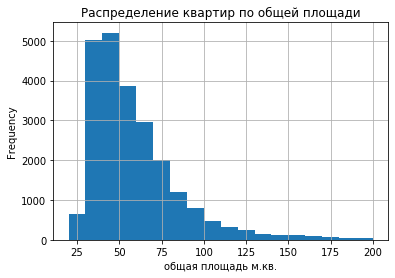

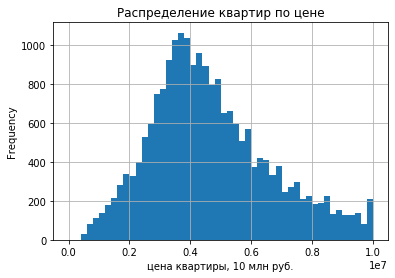

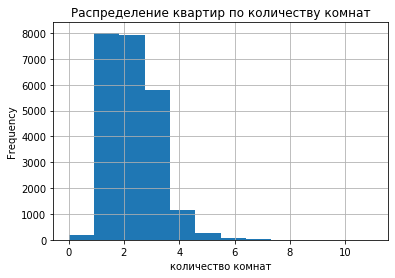

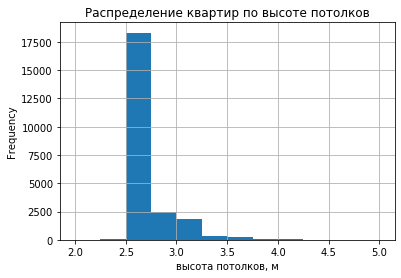

In [32]:
# построим гистограмммы распределения
#for column in ['total_area', 'last_price', 'rooms', 'ceiling_height']:
good_df['total_area'].plot(kind='hist', bins=18, range=(20, 200), grid=True, title='Распределение квартир по общей площади')
plt.xlabel('общая площадь м.кв.')
plt.show()

good_df['last_price'].plot(kind='hist', bins=50, range=(0, 10000000), grid=True, title='Распределение квартир по цене')
plt.xlabel('цена квартиры, 10 млн руб.')
plt.show()

good_df['rooms'].plot(kind='hist', bins=12, grid=True, title='Распределение квартир по количеству комнат')
plt.xlabel('количество комнат')

plt.show()

good_df['ceiling_height'].plot(kind='hist', bins=12, range=(2, 5), grid=True, title='Распределение квартир по высоте потолков')
plt.xlabel('высота потолков, м')
plt.show()

Во всех построенных гистограммах наблюдаем закономерное распределение, не противоречащее здравому смыслу. Во всех четырех случаях имеем дело с распределением Пуассона, которое стремится к нормальному и имеет хвост в виде больших значений, которые мы постарались отсечь на графиках с помощью диапазона range.

В результате можно заметить, что на рынке Санкт-Петербурга и Ленинградской области преобладают 1-2 квартиры, квартиры с площадью от 30-50 кв.м, высотой потолко 2,5-3 м, стоимостью 3-5 млн. 

Исходя из полученных результатов, можно предположить, что квартиры с такими параметрами являются наиболее ликвидными.

#### Изучение продолжительности продаж квартир

In [33]:
# посмотрим на основные статистические показатели по продолжительности размещения объявлений о продаже
good_df.query('days_exposition != -1')[['days_exposition']].describe()

,days_exposition
count,20259.000000
mean,179.682857
std,218.270115
min,1.000000
25%,45.000000
50%,95.000000
75%,230.000000
max,1580.000000


Среднее значение заметно выше значения медианы. 

По всей видимости в данных присутствует значительное количесвто объявлений с небольшим сроком продажи и какая-то часть объявлений, напротив, с большим сроком размещения - именно они и способствуют положительной скошенности нашего распределения. 

Построим гистограмму для оценки распределения объявлений по сроку размещения.

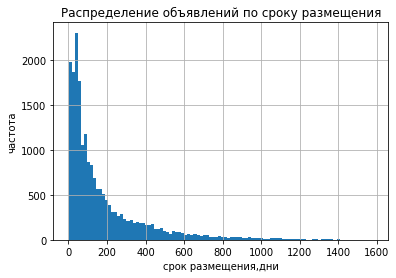

In [34]:
good_df.query('days_exposition > 0')['days_exposition'].hist(bins=100)
plt.xlabel('срок размещения,дни')
plt.ylabel('частота')
plt.title('Распределение объявлений по сроку размещения')
plt.show()

Действительно значительная часть квартир продается за короткий срок или какая-то часть объявлений снимается с публикации досрочно, но есть и объявления, которые находятся в публикации более 3 лет. Проверим нет ли очевидной ошибки и системности в небольших сроках продажи - построим гистограмму по коротким срокам продажи.

В тоже время видим длинный хвост у данных, что также объясняет разницу в показателях медианы и среднего значения. Как и предполагалось, длинный хвост с длинными продажами способствует увеличению среднего.

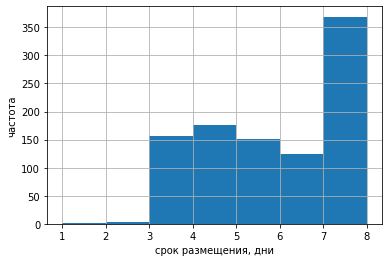

Количество продаж в первую неделю: 845


In [35]:
good_df.query('days_exposition > 0')['days_exposition'].hist(bins=7, range=(1,8))
plt.xlabel('срок размещения, дни')
plt.ylabel('частота')
plt.show()
print('Количество продаж в первую неделю:', good_df.query('7 >= days_exposition > 0')['days_exposition'].count())

Построив график распределения сроков для первой недели видим, что количество таких объявлений ококло 3%, что является вполне допустимой цифрой с учетом того, что квартиры действительно могут продваться в срочном порядке, по заниженной стоимости. Или сниматься досрочно с публикации ввиду интереса со стороны заинтересованных покупателей.

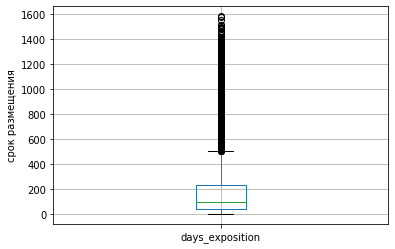

In [36]:
# посмотрим диаграмму размаха для значений сроков продажи
#plt.ylim(-10, 800)
good_df.query('days_exposition > 0').boxplot(column='days_exposition')
plt.ylabel('срок размещения')
plt.show()

Диаграмма размаха лишний раз показывает, что короткий срок продажи вполне приелем. Об этом говорит нам нижний "ус", упирающийся в нулевое значение. Следовательно, быстрая продажа даже в пределах нескольких дней не выглядит сверхъестественной.

А вот верхнюю границы, по которой мы можем утверждать, что действительно объявление размещенно слишком долго - это немногим меньше 1,5 года. Можно предположить, что есть ряд продавцов, которые не спешат с продажей и ждут хорошей сделки, которая удовлетворила бы финансовые запрос продавца. Либо долгие сроки могут быть связаны с особенностями объекта, окончательные выводы о которых можно сделать лишь получив дополнительные данные по объявлениям.

#### Работа с редкими и выбивающимися значениями

In [37]:
good_df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living_area,ratio_kitchen_area,price_per_sqmeter,day_exposition,month_exposition
count,23379.000000,2.337900e+04,23379.000000,23379.000000,23379.000000,23379.000000,23379.000000,23379.000000,23379.000000,12022.000000,...,17876.000000,7891.000000,17876.000000,8896.000000,23379.000000,23379.000000,23379.000000,2.337900e+04,23379.000000,23379.000000
mean,9.847727,6.020638e+06,58.150743,2.034860,2.692551,10.721374,33.349933,5.886608,10.249964,1.156796,...,0.603211,491.771639,0.762755,520.249663,155.570170,0.564480,0.187018,9.838092e+04,2.566491,6.400701
std,5.665785,6.233381e+06,26.464811,0.995167,0.210632,6.625536,17.529625,4.882696,5.273412,1.069790,...,0.794195,342.108317,0.934523,277.731085,212.271309,0.102226,0.072689,4.559491e+04,1.789569,3.492866
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,13.000000,-1.000000,0.021583,0.000000,1.118349e+02,0.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,297.000000,22.000000,0.491324,0.135542,7.647059e+04,1.000000,3.000000
50%,9.000000,4.600000e+06,51.800000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,1.000000,...,0.000000,456.000000,0.000000,504.000000,73.000000,0.571429,0.174163,9.482759e+04,3.000000,6.000000
75%,14.000000,6.700000e+06,68.900000,3.000000,2.700000,16.000000,42.000000,8.000000,11.688183,2.000000,...,1.000000,613.000000,1.000000,733.000000,197.000000,0.633069,0.236111,1.138490e+05,4.000000,10.000000
max,50.000000,3.300000e+08,199.200000,11.000000,6.000000,60.000000,164.700000,33.000000,93.200000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.000000,0.787879,1.736842e+06,6.000000,12.000000


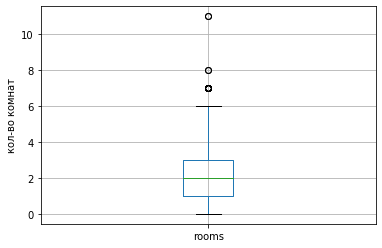

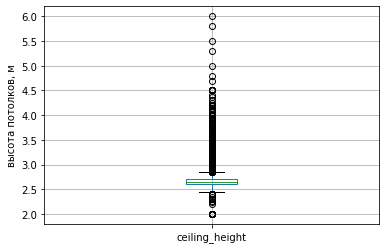

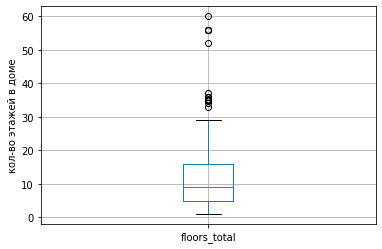

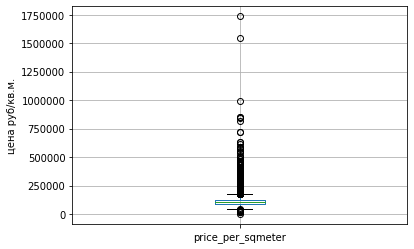

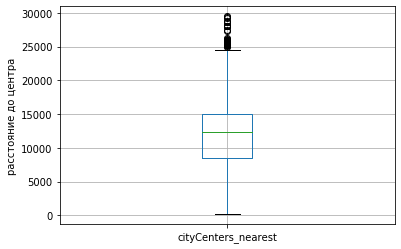

In [38]:
# выявим границы для определения редких и выбивающихся значений
good_df.boxplot(column='rooms')
plt.ylabel('кол-во комнат')
plt.show()

good_df.boxplot(column='ceiling_height')
plt.ylabel('высота потолков, м')
plt.show()

good_df.boxplot(column='floors_total')
plt.ylabel('кол-во этажей в доме')
plt.show()

good_df.query("locality_name == 'Санкт-Петербург'").boxplot(column='price_per_sqmeter')
plt.ylabel('цена руб/кв.м.')
plt.show()

good_df.query("locality_name == 'Санкт-Петербург'").boxplot(column='cityCenters_nearest')
plt.ylabel('расстояние до центра')
plt.show()

In [39]:
# проверим количество потери данных в случае удаления редких и выбивающихся значений
print(good_df.shape[0])
print(good_df.query('price_per_sqmeter > 250000\
      or floors_total > 30\
      or ceiling_height > 4 \
      or rooms > 7 \
      or days_exposition > 1100').shape[0] / good_df.shape[0]) 


23379
0.01886308225330425


In [40]:
# очистим фрейм
good_df = good_df.query('price_per_sqmeter <= 250000')
good_df = good_df.query('floors_total <= 30')
good_df = good_df.query('ceiling_height <= 4')
good_df = good_df.query('rooms <= 7')
good_df = good_df.query('days_exposition <= 1100')

print(good_df.shape[0])

22938


Ранне на этапе предобработки данных с целью корректного подсчета значений для замены пропусков в площадях, как одной из основных характеристик квартиры данные были очищены от редких и выбивающихся значений. Это коснулось значений общей площади и количества комнат. 

На последующих этапах работы с данными в ряде столбцов также обнаружились редкие значения, которые могут повлиять на дальнейшие результаты и выводы исследования. Для определения границ нормальных значений мы использовали диаграмму размаха. Однако во избежание потери большого количества данных, границы для удаления редких данных были расширены. Всего к данному моменту мы избавились от 2% данных, что можно оценить как небольшие потери.

#### Изучение факторов  зависимости цены 

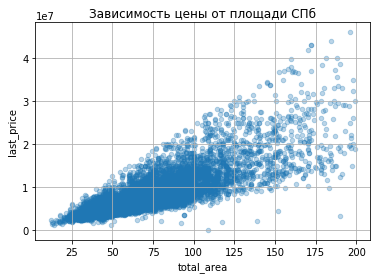

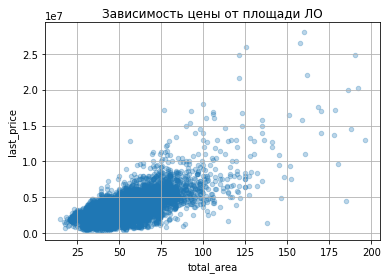

0.8412419526395868
0.6809643567225624


In [41]:
good_df_spb = good_df.copy().query("locality_name == 'Санкт-Петербург'")
good_df_lo = good_df.query("locality_name != 'Санкт-Петербург'")

good_df_spb.plot(kind='scatter', x='total_area', y='last_price', 
                 style='o', alpha=0.3, title='Зависимость цены от площади СПб')
plt.grid()
plt.show()

good_df_lo.plot(kind='scatter', x='total_area', y='last_price', 
                style='o', alpha=0.3, title='Зависимость цены от площади ЛО')
plt.grid()
plt.show()

print(good_df_spb['total_area'].corr(good_df_spb['last_price']))
print(good_df_lo['total_area'].corr(good_df_lo['last_price']))

Т.к. порядок цен для Санкт-Петербурга и области существенно разнится, целесообразно рассматривать зависимость для Санкт-Петербурга и области по отдельности. 

По Санкт-Петербургу сильная зависимость цены от общей площади, что является закономерным фактом.

В Ленинградской области взаимосвязь этих данных также заметна, но в меньшей степени, что, по всей видимости, обусловлено различиями в ценах на квартиры в разных населенных пунктах. 

С целью получения более целостной картины по влиянию различных факторов, в дальнейшем будем рассматривать только квартиры в Санкт-Петербурге.

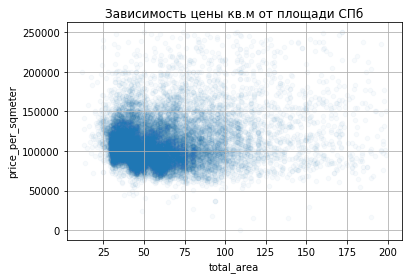

0.13751919897822057


In [42]:
good_df_spb.plot(kind='scatter', x='total_area', y='price_per_sqmeter', style='o', alpha=0.03, title='Зависимость цены кв.м от площади СПб')
plt.grid()
plt.show()

print(good_df_spb['price_per_sqmeter'].corr(good_df_spb['total_area']))

Зависимоть стоимости квдратного метра практически отсутствует. В данном случае скорее всего имеют влияние значение другие факторы. Например, можно предположить, что квартиры с большим метражом, продаются с более качественной отделкой или в центральной части квартиры, что увеличивает стоимость квадратного метра. 

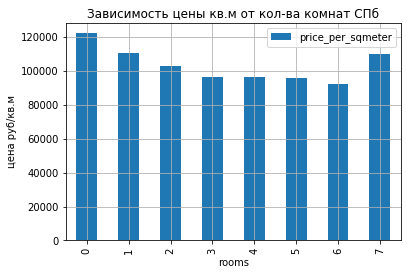

-0.12580730675228938


In [43]:
rooms_grouped_spb = good_df_spb.pivot_table(index='rooms', values='price_per_sqmeter', aggfunc='median').sort_values(by='price_per_sqmeter').sort_index()
rooms_grouped_spb.plot(kind='bar', y='price_per_sqmeter', title='Зависимость цены кв.м от кол-ва комнат СПб')
plt.ylabel('цена руб/кв.м')
plt.grid()
plt.show()

print(good_df_spb['price_per_sqmeter'].corr(good_df_spb['rooms']))

Как и впредыдущем случае, зависимость цены от количества комнат практически отсутствует. Вывод: влияние на цену за кв.м. оказывают другие характеристики квартиры.

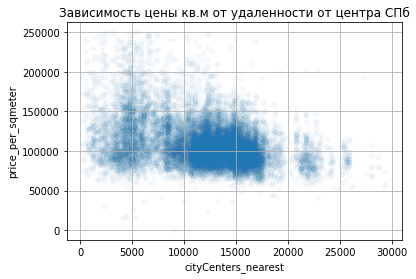

-0.3411924944599284


In [44]:
good_df_spb.plot(kind='scatter', x='cityCenters_nearest', y='price_per_sqmeter', style='o', alpha=0.03, title='Зависимость цены кв.м от удаленности от центра СПб')
plt.grid()
plt.show()

print(good_df_spb['price_per_sqmeter'].corr(good_df_spb['cityCenters_nearest']))

Удаленность от центра имеет большее влияние по сравнению с количеством комнат и общей площадью. Однако, взаимосвязь также можно охарактеризовать, как слабую. Квартиры отдаленные от центра в целом имеют меньшую стоимость за кв.м. Однако, это тенденция не столь явная. Возможно, это связано с етм, что в центре преобладает старый жилой фонд, в котором вероятность наличия квартир без надлежащего ремонта возрастает.

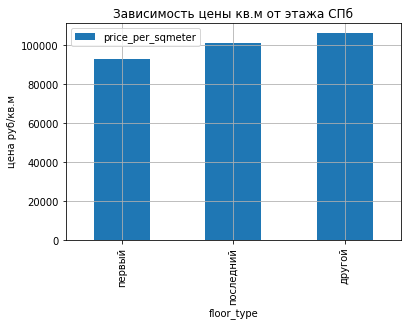

In [45]:
good_df_spb.pivot_table(index='floor_type', values='price_per_sqmeter', aggfunc='median').sort_values(by='price_per_sqmeter').plot(kind='bar', y='price_per_sqmeter', title='Зависимость цены кв.м от этажа СПб')
plt.ylabel('цена руб/кв.м')
plt.grid()
plt.show()

Очевидно, что средние цены на квартиры на первом этаже самые низкие.
Средняя цена кв.м. на последнем этаже выше чем на первом, но уступает в цене квартирам между первым и последнем этажами.
Таким образом, гипотеза о различиях в ценах между первым/последним и другими этажами потдверждается.

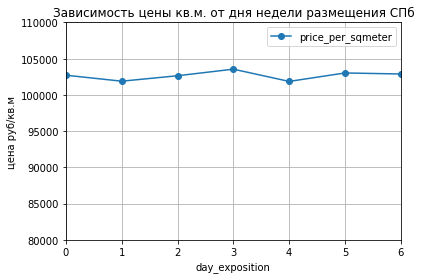

In [46]:
# создадим сводную таблицу для группировки данных по дням и подсчета медианы
day_exp_pivot = good_df_spb.query('days_exposition > 0').pivot_table(index='day_exposition', values=['price_per_sqmeter', 'days_exposition'], aggfunc='median')
# построим графики для определения зависимости цены от дня размещения
day_exp_pivot.plot(kind='line', style='-o', y='price_per_sqmeter', ylim=(80000,110000), title='Зависимость цены кв.м. от дня недели размещения СПб')
plt.ylabel('цена руб/кв.м')
plt.grid()
plt.show()

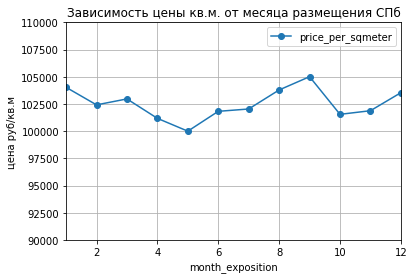

In [47]:
# создадим сводную таблицу для группировки данных по месяцам и подсчета медианы
month_exp_pivot = good_df_spb.query('days_exposition > 0').pivot_table(index='month_exposition', values=['price_per_sqmeter', 'days_exposition'], aggfunc='median')
# построим графики для определения зависимости цены от месяца размещения
month_exp_pivot.plot(kind='line', style='-o', y='price_per_sqmeter', ylim=(90000, 110000), title='Зависимость цены кв.м. от месяца размещения СПб')
plt.ylabel('цена руб/кв.м')
plt.grid()
plt.show()

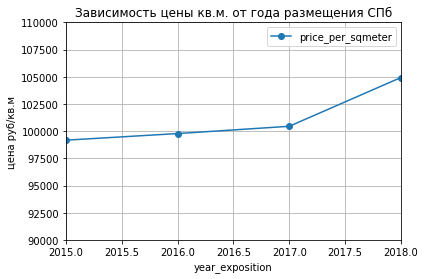

In [48]:
# создадим сводную таблицу для группировки данных по годам и подсчета медианы
year_exp_pivot = good_df_spb.query('days_exposition > 0').pivot_table(index='year_exposition', values=['price_per_sqmeter', 'days_exposition'], aggfunc='median')
# построим графики для определения зависимости цены от года размещения
# исключим неполные годы
year_exp_pivot.plot(kind='line', style='-o', y='price_per_sqmeter', ylim=(90000, 110000), xlim=(2015,2018), title='Зависимость цены кв.м. от года размещения СПб')
plt.ylabel('цена руб/кв.м')
plt.grid()
plt.show()

#### Выявление ТОП-10 активных населенных пунктов по количеству объявлений

In [49]:
top_10_count = good_df.pivot_table(index = 'locality_name', values = ['days_exposition','price_per_sqmeter'], aggfunc = ['mean', 'count']).sort_values(by=('count', 'days_exposition'), ascending = False).head(10)
top_10_count

mean                             count  \
                days_exposition price_per_sqmeter days_exposition   
locality_name                                                       
Санкт-Петербург      148.492102     109837.966295           15068   
Мурино               135.732877      86097.436365             584   
Кудрово              144.596154      95250.856793             468   
Шушары               142.705479      78509.293512             438   
Всеволожск           162.741117      67174.264539             394   
Пушкин               157.816156     102700.658490             359   
Колпино              127.437500      75310.766883             336   
Парголово            139.846154      90259.743484             325   
Гатчина              165.403909      68746.146763             307   
Выборг               155.800847      58093.893157             236   

                                   
                price_per_sqmeter  
locality_name                      
Санкт-Петербург             15068  
Мурино                        584  
Кудрово                       468  
Шушары                        438  
Всеволожск                    394  
Пушкин                        359  
Колпино                       336  
Парголово                     325  
Гатчина                       307  
Выборг                        236

In [50]:
max_price_per_m = top_10_count['mean', 'price_per_sqmeter']
min_price_per_m  = top_10_count['mean', 'price_per_sqmeter']

print('Максимальная ср.цена за кв.м. в ТОП-10 населенных пунктов по количеству объявлений: {}-{:.0f} ₽/м.кв.'.format(max_price_per_m.idxmax(),max_price_per_m.max()))
print('Минимальная ср.цена за кв.м. в ТОП-10 населенных пунктов по количеству объявлений: {}-{:.0f} ₽/м.кв.'.format(max_price_per_m.idxmin(),max_price_per_m.min()))


Максимальная ср.цена за кв.м. в ТОП-10 населенных пунктов по количеству объявлений: Санкт-Петербург-109838 ₽/м.кв.
Минимальная ср.цена за кв.м. в ТОП-10 населенных пунктов по количеству объявлений: Выборг-58094 ₽/м.кв.


Зависимость стоимости кв.м. в Санкт-Петурбурге от времени размещения объявления присутствует.
В разных временных интервалах она проявляется по-разному. Так, если говорить о зависимости от дня недели размещения, то она прогнозируемо отсутствует.

Зависимость стоимости квартир от месяца размещения определенно есть. Скорее всего, тут имеет место быть фактор сезонности. В марте и апреле наблюдаются наивысшая стоимость за кв.м. Возможно, это связано с высокой активностью на рынке недвижимости и повышенным спросом. В то время как с мая по июль стоимость существенно ниже, что может также объясняться низкой активностью рынка в период отпусков и праздников.

При этом зависимость цен на квартиры от года размещения также присутствует. Из года в год цены за кв.м. жилой недвижимости в Санкт-Петербурге растут. Если с 2015 по 2017 рост был полее плавным, то в 2018 мы видим некоторый скачок в ценах. Если плавный рост можно объяснить инфляцией, то скачок в ценах наверняка имеет под собой дургие факторы рыночной конъюнктуры, которые требуют дополнительного изучения.

#### Изучение рынка жилой недвижимости Санкт-Петербурга

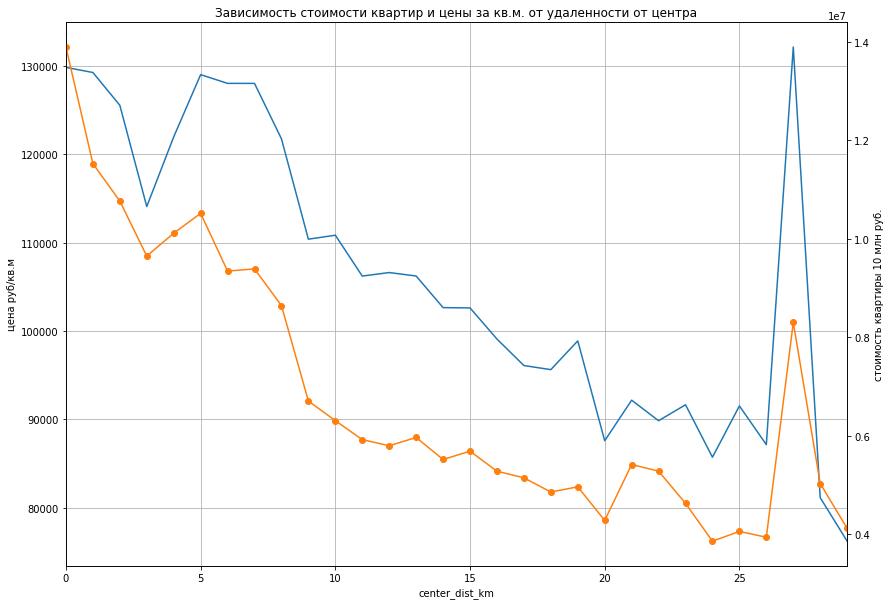

In [51]:
# создадим новый столбец для определения расстояния объекта от центра в км
# округлим до целого числа и переведем в int
good_df_spb.loc[:, 'center_dist_km'] = (good_df_spb['cityCenters_nearest']/1000).round(0).astype('int')
# посчитаем среднюю цену кв.м. для каждого километра
price_km = good_df_spb.query('2014 < year_exposition < 2019').pivot_table(index='center_dist_km', values=['price_per_sqmeter', 'last_price'], aggfunc='mean')
price_km['price_per_sqmeter'].plot(title = 'Зависимость стоимости квартир и цены за кв.м. от удаленности от центра')
plt.ylabel('цена руб/кв.м')
price_km['last_price'].plot(secondary_y = True, style = '-o', grid=True, figsize=(14,10))
plt.ylabel('стоимость квартиры 10 млн руб.')
plt.show()

Нужно отметить, что на 3 км наблюдается провал в цене. Возможно, это и является условной границей центральной части СПб с остальным Петербургом. 

Далее, с 4 по 5 км от центра, наблюдаются цены близкие к ценам центрального района, что может быть обусловлено особенностями каких-то конкретных престижных районов. С 5 по 7 км средняя цена за м кв. плавно снижается. После 7 км видим резкое снижение.

Можем сделать вывод, что номинально центральной частью Санкт-Петербруга можно считать радиус около 3 км с возможным расширением до 5 км (если рассматривать центр в более широком понимании).

Высокие значения цены на 27 км также не берем во внимание, т.к. количество объектов на таком расстоянии невелико.

#### Исследование рынка жилой недвижимрости в центре Санкт-Петербурга

In [52]:
good_df_spb.loc[good_df_spb['center_dist_km']<=3, 'is_center'] = 1.
good_df_spb.loc[good_df_spb['center_dist_km']>3, 'is_center'] = 0
good_df_spb['is_center'] = good_df_spb['is_center'].astype('int')

spb_center_categorized = good_df_spb.pivot_table(index='is_center', values=['total_area', 'last_price', 'price_per_sqmeter', 'rooms', 'ceiling_height'])
spb_center_categorized

,ceiling_height,last_price,price_per_sqmeter,rooms,total_area
is_center,,,,,
0,2.694025,6.579202e+06,109156.642331,2.063317,59.336090
1,3.004928,1.061369e+07,122682.583679,2.955204,87.514321


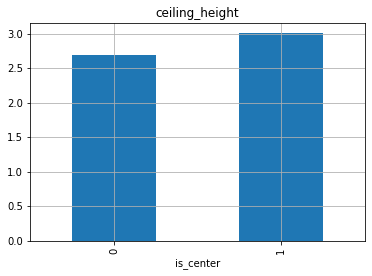

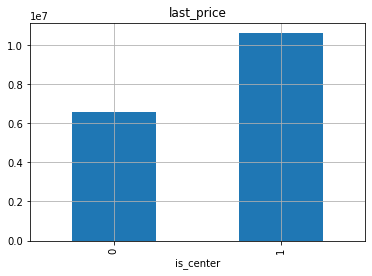

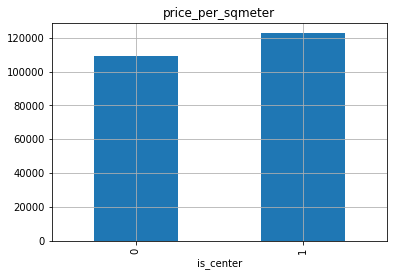

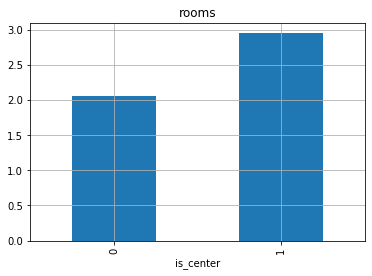

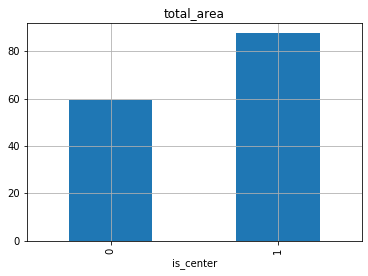

In [53]:
spb_center_categorized.columns
for column in spb_center_categorized.columns:
    spb_center_categorized[column].plot(kind='bar', title=column, grid=True)
    plt.show()

Все познается в сравнении. 
Если сравнивать квартиры в центральной части с остальными, видны явные различия по всем рассматриваевым рпараметрам:
- Средняя высота потолков в центре на 30 см выше и составляют около 3 м;
- Средняя цена на квартиру в центре 10,6 млн,а в других района около 6,6 млн;
- Цена за квадрат в центре также выше в среднем на 13%;
- По количеству комнат в центре преобладают квартиры, где в среднем 3 комнаты, в других районах - в среднем 2-х комнатные;
- По общему метражу квартиры в центре заметно больше - в среднем 87 кв.м. против 59 кв.м. не в центральных районах.

In [54]:
good_df_spb_center = good_df_spb.query('is_center == 1')

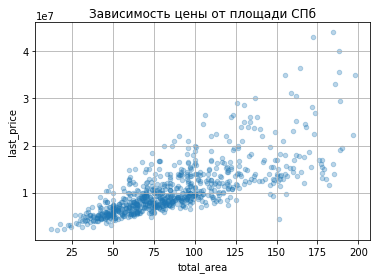

Коэф.корреляции СПб: 0.74
Коэф.корреляции СПб-ЦЕНТР: 0.84


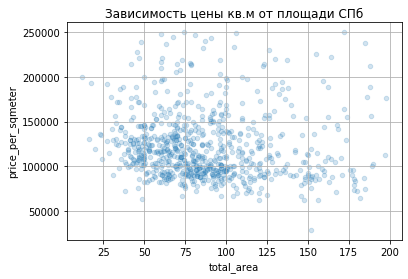

Коэф.корреляции СПб: -0.09
Коэф.корреляции СПб-ЦЕНТР: 0.14


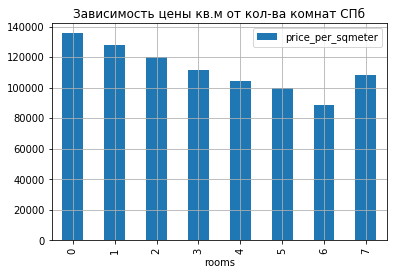

Коэф.корреляции СПб: -0.19
Коэф.корреляции СПб-ЦЕНТР: -0.13


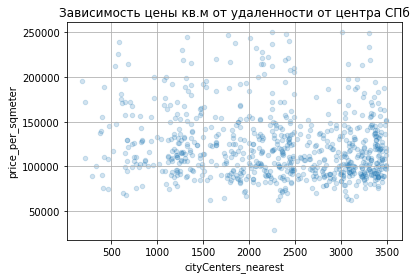

Коэф.корреляции СПб: -0.15
Коэф.корреляции СПб-ЦЕНТР: -0.34


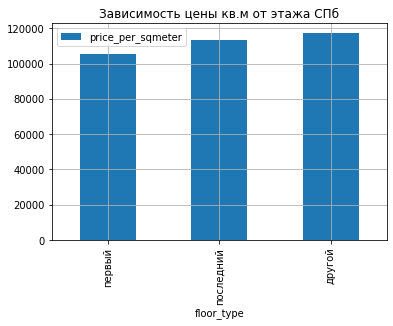

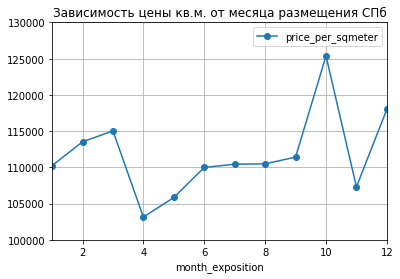

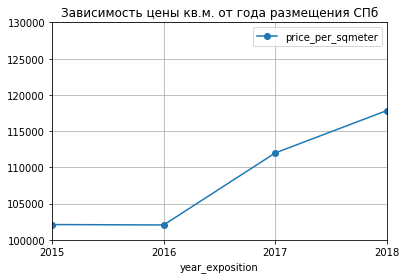

In [74]:
# Зависимость цены от площади
good_df_spb_center.plot(kind='scatter', x='total_area', y='last_price', 
                        style='o', alpha=0.3, title='Зависимость цены от площади СПб')
plt.grid()
plt.show()
print('Коэф.корреляции СПб: {:.2f}'
      .format(good_df_spb_center['total_area'].corr(good_df_spb_center['last_price'])))
print('Коэф.корреляции СПб-ЦЕНТР: {:.2f}'
      .format(good_df_spb['total_area'].corr(good_df_spb['last_price'])))

# Зависимость цены кв.м от площади
good_df_spb_center.plot(kind='scatter', x='total_area', y='price_per_sqmeter', 
                        style='o', alpha=0.2, title='Зависимость цены кв.м от площади СПб')
plt.grid()
plt.show()
print('Коэф.корреляции СПб: {:.2f}'
      .format(good_df_spb_center['total_area'].corr(good_df_spb_center['price_per_sqmeter'])))
print('Коэф.корреляции СПб-ЦЕНТР: {:.2f}'
      .format(good_df_spb['total_area'].corr(good_df_spb['price_per_sqmeter'])))

# Зависимость цены кв.м от кол-ва комнат
rooms_grouped_center = good_df_spb_center.\
                        pivot_table(index='rooms', 
                                    values='price_per_sqmeter', 
                                    aggfunc='median').sort_values(by='price_per_sqmeter').sort_index()
rooms_grouped_center.plot(kind='bar', y='price_per_sqmeter', title='Зависимость цены кв.м от кол-ва комнат СПб')
plt.grid()
plt.show()
print('Коэф.корреляции СПб: {:.2f}'
      .format(good_df_spb_center['rooms'].corr(good_df_spb_center['price_per_sqmeter'])))
print('Коэф.корреляции СПб-ЦЕНТР: {:.2f}'
      .format(good_df_spb['rooms'].corr(good_df_spb['price_per_sqmeter'])))

# Зависимость цены кв.м от от удаленности
good_df_spb_center.plot(kind='scatter', x='cityCenters_nearest', y='price_per_sqmeter', 
                        style='o', alpha=0.2, title='Зависимость цены кв.м от удаленности от центра СПб')
plt.grid()
plt.show()
print('Коэф.корреляции СПб: {:.2f}'
      .format(good_df_spb_center['cityCenters_nearest'].corr(good_df_spb_center['price_per_sqmeter'])))
print('Коэф.корреляции СПб-ЦЕНТР: {:.2f}'
      .format(good_df_spb['cityCenters_nearest'].corr(good_df_spb['price_per_sqmeter'])))

# Зависимость цены кв.м от этажности
floor_grouped_center = good_df_spb_center.\
                        pivot_table(index='floor_type', 
                                    values='price_per_sqmeter', 
                                    aggfunc='median').sort_values(by='price_per_sqmeter')
floor_grouped_center.plot(kind='bar', y='price_per_sqmeter', title='Зависимость цены кв.м от этажа СПб')
plt.grid()
plt.show()

# Зависимость цены от месяца размещения объявления
month_exp_pivot = good_df_spb_center.query('days_exposition > 0').\
                    pivot_table(index='month_exposition', 
                                values=['price_per_sqmeter', 'days_exposition'], 
                                aggfunc='median')
month_exp_pivot.plot(kind='line', style='-o', y='price_per_sqmeter', 
                     ylim=(100000, 130000), title='Зависимость цены кв.м. от месяца размещения СПб')
plt.grid()
plt.show()


# Зависимость цены от года размещения объявления
year_exp_pivot = good_df_spb_center.query('days_exposition > 0').\
                    pivot_table(index='year_exposition', 
                                values=['price_per_sqmeter', 
                                        'days_exposition'], aggfunc='median')
year_exp_pivot.plot(kind='line', style='-o', y='price_per_sqmeter', 
                    xlim=(2015,2018), ylim=(100000, 130000), title='Зависимость цены кв.м. от года размещения СПб')
plt.xticks(np.arange(2015, 2019, 1))
plt.grid()
plt.show()

В целом для центральной части Санкт-Петербурга зависимость цены от рассматриваемых параметров схожа с остальной частью Петербурга. 

Можно отметить, что для центральной части более ярко выражается зависимость цены от площади и удаленности центра. Можно предположить, что это связано с более узким сегментом и, как следствие, однородностью выборки.

По остальным параметрам мы имеем схожую картину.

Бросается в глаза более ввыраженная сезонность по месяцам - начиная с апреля по июль цена за кв.метр кварир в центре заметно ниже соседсвующих месяцев, тогда как для Санкт-Петербурга в целом средняя стоимость квартир в апреле одна из самых высоких на протяжении года.

Также, для квартир в центре более заметна динамика роста цен из года в год, что позволяет выдвинуть гипотезу о более высоких темпах роста цен на квартиры в центре и о их ликвидности.


### Общий вывод по проекту

Мы проделали масштабную работу, начиная от предобработки данных, заканчивая сегментацией и найденными закономерностями. Определили степень зависимости между различными факторами влияния на ценовую составляющую объектов жилой недвижимости.

На этапе предобработки нам удалось сохранить почти 97% данных. Это увеличило вероятноть полноты обзора рынка недвижимости Санкт-Петербурга.

Среди всех объявлений подавляющее большинство - это объявления о продаже квартир в самом Санкт-Петербурге и ближайшем пригороде(города-спутники, фактически входящие в конгламерацию г. Санкт-Петербурга). В топ самых наиболее активных регионов по размещению объявлений также вошли районные центры Ленинградской области.

В ходе исследования мы изучили распределение типов квартир по различным признакам. В итоге, типовой квартирой для рынка недвижимости Санкт-Петербурга мы можем считать 1-но/2-х комнатную квартиру площадью 30-50 кв.м., высотой потолков 2,5-2.7 м с рыночной стоимостью 3-5 млн руб. Следует отметить, что этот портрет типовой квартиры является достаточно грубым и поверхностным. Его  можно более точно конкретизировать и разделить на подкатегорий.

Мы получили представление о сроках продажи квартиры. Среднее время продажи квариры составляет порядка 3-х месяцев. Однако, присутствует понимание такого явления, как быстрые и срочные продажи, что не является аномалией. В 75% случаев время продажи доходит до 8 меясцев .

Мы выяснили, что целесообразно разделять квартиры в центре Санкт-Петербурга с остальными районами, убедившись в различиях параметров квартир для этих двух типов и порядком ценообразования. Так, в центральной части Петербурга квартиры дороже примерно на 17%. 

Также, исходя из графика изменения средней цены за кв.м. во времени можно отметить, что темпы роста цен на квартиры в центре выше, чем в остальной части Санкт-Петербурга. К отличительным особенностям цен на квартиры в Санкт-Петербурге можно отнести и более выразительные сезонные колебания в цене.

Совершенно точно следует сегментироовать рынок на дальний пригород (Ленобласть), ближайший пригород (города-спутники Санкт-Петербурга), центр Санкт-Петербурга и другие районы Санкт-Петербурга, где порядок цен существенно разнится. 

На основании выявленных параметров и расчетов мы можем определять адекватную рыночную цену, выявлять аномалии и способствовать препятствованию мошеннической деятельности.